<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Data Analysis on Sub Saharan African Region </h1>
Perform an analysis for normalization of parameter, then find the best values of the parameters as well as R^2
</div>

In [1]:
"""
Created on Tue Oct 29 18:14:36 2019
@author: Jean-Philippe Matondo, Kuan-chieh chen, Marco Gutierrez, 
         Sarthak Jagdale, and Shreenidhi Kotwal 


"""
"""
Project: Sub-African Region

1. Angola : Outlier GDP negative beacuse oil prices and production, 
    1/3rd of the oil makes the GDP(box plot) 
2. Equatorial Guinea: GDP weakening not only because of the decline in the hydrocarbon sector 
    but also their lack of economic diversification, corruption and infrastructure expense. 

"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Data Set </h1> <br/>
Perform an analysis for normalization of parameter, then find the best values of the parameters as well as R^2
</div>

In [2]:
file='WDIW Dataset (1).xlsx'
africa=pd.read_excel(file)

africa

,Country Code,Country Name,Hult Region,Cool Name,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)",...,Poverty headcount ratio at national poverty lines (% of population),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Prevalence of underweight, weight for age (% of children under 5)",Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Tax revenue (% of GDP),Urban population (% of total population),Urban population growth (annual %)
0,AFG,Afghanistan,Middle East & Russia,Mirage,97.700000,97.091973,99.500000,68.957000,86.000753,4.750925,...,NaN,0.1,29.8,NaN,74.750000,52.655431,6.528600e+05,9.250468,25.250000,3.463407
1,ALB,Albania,Eastern Europe,Skids & Mudflap,100.000000,100.000000,100.000000,19.642000,45.682097,19.418064,...,NaN,NaN,6.2,NaN,40.617000,47.965907,2.875000e+04,18.879748,59.383000,1.541285
2,DZA,Algeria,Northern Sub-Saharan Africa,Bumblebee,100.000000,100.000000,100.000000,10.071000,55.804001,9.624334,...,NaN,0.1,3.9,NaN,27.948000,45.615016,2.381740e+06,NaN,72.052000,2.871374
3,ASM,American Samoa,Australia & Oceania,Cliffhanger,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.830000,NaN,2.000000e+02,NaN,87.170000,-0.249256
4,AND,Andorra,Eastern Europe,Skids & Mudflap,100.000000,100.000000,100.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.850000,79.285586,4.700000e+02,NaN,88.150000,-0.495265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,PSE,West Bank,Arabian Peninsula,Wheeljack,100.000000,100.000000,100.000000,52.766000,73.481011,5.367632,...,NaN,NaN,NaN,NaN,24.106000,NaN,6.020000e+03,6.386103,75.894000,2.339809
213,WLD,World,World,Sentinel Prime,88.848638,78.647356,97.357692,42.455699,54.216831,13.216044,...,NaN,0.8,10.8,13.5,45.177758,65.035716,1.320366e+08,15.204328,54.822242,1.985135
214,YEM,Yemen,Arabian Peninsula,Wheeljack,79.200000,68.702845,97.848656,60.352000,74.987414,4.990006,...,NaN,0.1,38.9,NaN,63.984000,19.112768,5.279700e+05,NaN,36.016000,4.166123
215,ZMB,Zambia,East/South Africa,Jazz,40.300000,13.997701,75.200000,120.112000,90.462311,3.970773,...,NaN,11.6,46.7,NaN,57.024000,52.093837,7.526100e+05,15.184871,42.976000,4.211349


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Data Wrangling </h1>
    <br/>
Slice Data  into the following fragments.
</div>

In [3]:
africa_1=africa.loc[africa['Cool Name']=='Sideswipe',[
'Country Name',
'Surface area (sq. km)',
'GDP (current US$)',
'GDP growth (annual %)',
'Tax revenue (% of GDP)',
'Agriculture, forestry, and fishing, value added (% of GDP)',
'Industry (including construction), value added (% of GDP)',
'Services, value added (% of GDP)',
'Merchandise trade (% of GDP)',
'Access to electricity (% of population)',
'Access to electricity, rural (% of rural population)',
'Access to electricity, urban (% of urban population)',
'Government expenditure on education, total (% of government expenditure)',
'Military expenditure (% of GDP)',
'Population density (people per sq. km of land area)',
'Population ages 0-14 (% of total population)',
'Population ages 15-64 (% of total population)',
'Population ages 65 and above (% of total population)',
'Population, female',
'Population, male',
'Population, total',
'Population growth (annual %)']]

africa_1


,Country Name,Surface area (sq. km),GDP (current US$),GDP growth (annual %),Tax revenue (% of GDP),"Agriculture, forestry, and fishing, value added (% of GDP)","Industry (including construction), value added (% of GDP)","Services, value added (% of GDP)",Merchandise trade (% of GDP),Access to electricity (% of population),...,"Government expenditure on education, total (% of government expenditure)",Military expenditure (% of GDP),Population density (people per sq. km of land area),Population ages 0-14 (% of total population),Population ages 15-64 (% of total population),Population ages 65 and above (% of total population),"Population, female","Population, male","Population, total",Population growth (annual %)
5,Angola,1.246700e+06,1.221238e+11,-0.147207,9.223777,10.016996,42.167953,46.762624,40.186263,41.886230,...,NaN,2.421113,23.916538,46.953016,50.807787,2.239197,15067439.0,14749309.0,29816748.0,3.322081
20,Benin,1.147600e+05,9.246697e+09,5.837823,NaN,23.017756,21.540535,46.156910,59.880842,43.077747,...,NaN,1.264103,99.106101,42.668577,54.087471,3.243951,5600901.0,5574303.0,11175204.0,2.750056
30,Burkina Faso,2.742200e+05,1.232286e+10,6.302096,17.426999,28.664434,18.321741,55.125406,54.938526,25.473743,...,NaN,1.427258,70.150892,45.181531,52.409839,2.408630,9621412.0,9571872.0,19193284.0,2.890851
33,Cameroon,4.754400e+05,3.492278e+10,3.549087,12.245452,14.372215,25.288278,52.145025,23.875532,61.401875,...,15.468630,1.306176,51.968533,42.867328,54.401275,2.731397,12286560.0,12279485.0,24566045.0,2.637694
35,Cape Verde,4.030000e+03,1.771236e+09,4.013257,20.053674,5.994891,18.137077,62.014815,47.368054,92.913635,...,16.382910,0.537770,133.373945,29.183178,66.284340,4.532482,267872.0,269625.0,537497.0,1.188624
37,Central African Rep.,6.229800e+05,2.167502e+09,4.457283,NaN,33.896255,17.809353,28.221490,23.437122,29.982038,...,NaN,1.435513,7.377489,44.646230,52.522170,2.831600,2318150.0,2277878.0,4596028.0,1.277504
42,Comoros,1.861000e+03,1.068124e+09,2.707659,NaN,29.938753,12.241375,53.021153,27.337641,79.931290,...,NaN,NaN,437.341200,39.772476,57.264600,2.962924,403369.0,410523.0,813892.0,2.274119
43,"Congo, Dem. Rep.",2.344860e+06,3.801927e+10,3.726948,NaN,19.702697,42.191716,33.750293,33.667142,19.093632,...,11.710750,0.737512,35.905147,46.283467,50.696769,3.019765,40787890.0,40610874.0,81398764.0,3.258508
46,Cote d'Ivoire,3.224600e+05,3.805361e+10,7.702089,16.183213,21.575709,24.687602,31.836567,56.388868,65.635757,...,18.623520,1.277401,76.847387,42.166738,54.992706,2.840556,12093605.0,12343864.0,24437469.0,2.547807
60,Equatorial Guinea,2.805000e+04,1.228991e+10,-4.685684,5.924105,2.320428,56.104882,41.669986,59.984148,67.184097,...,NaN,NaN,44.991123,37.285044,60.231204,2.483752,561891.0,700110.0,1262001.0,3.780717


In [37]:
#Re_indexing
africa_1.reset_index(inplace = True) 
del africa_1['index']

In [38]:
africa_1

,Country Name,Surface area (sq. km),GDP (current US$),GDP growth (annual %),Tax revenue (% of GDP),"Agriculture, forestry, and fishing, value added (% of GDP)","Industry (including construction), value added (% of GDP)","Services, value added (% of GDP)",Merchandise trade (% of GDP),Access to electricity (% of population),...,Population ages 0-14 (% of total population),Population ages 15-64 (% of total population),Population ages 65 and above (% of total population),"Population, female","Population, male","Population, total",Population growth (annual %),GDP_per_Sqr_meter,People_with_electricity_per_sqr_meter,GDP_per_Person
0,Angola,1.246700e+06,1.221238e+11,-0.147207,9.223777,10.016996,42.167953,46.762624,40.186263,41.886230,...,46.953016,50.807787,2.239197,15067439.0,14749309.0,29816748.0,3.322081,9.795767e+04,0.570988,4095.812942
1,Benin,1.147600e+05,9.246697e+09,5.837823,NaN,23.017756,21.540535,46.156910,59.880842,43.077747,...,42.668577,54.087471,3.243951,5600901.0,5574303.0,11175204.0,2.750056,8.057422e+04,2.300633,827.429810
2,Burkina Faso,2.742200e+05,1.232286e+10,6.302096,17.426999,28.664434,18.321741,55.125406,54.938526,25.473743,...,45.181531,52.409839,2.408630,9621412.0,9571872.0,19193284.0,2.890851,4.493788e+04,2.753851,642.040426
3,Cameroon,4.754400e+05,3.492278e+10,3.549087,12.245452,14.372215,25.288278,52.145025,23.875532,61.401875,...,42.867328,54.401275,2.731397,12286560.0,12279485.0,24566045.0,2.637694,7.345361e+04,0.846367,1421.587492
4,Cape Verde,4.030000e+03,1.771236e+09,4.013257,20.053674,5.994891,18.137077,62.014815,47.368054,92.913635,...,29.183178,66.284340,4.532482,267872.0,269625.0,537497.0,1.188624,4.395126e+05,1.435461,3295.341106
5,Central African Rep.,6.229800e+05,2.167502e+09,4.457283,NaN,33.896255,17.809353,28.221490,23.437122,29.982038,...,44.646230,52.522170,2.831600,2318150.0,2277878.0,4596028.0,1.277504,3.479248e+03,0.246064,471.603228
6,Comoros,1.861000e+03,1.068124e+09,2.707659,NaN,29.938753,12.241375,53.021153,27.337641,79.931290,...,39.772476,57.264600,2.962924,403369.0,410523.0,813892.0,2.274119,5.739518e+05,5.471464,1312.366174
7,"Congo, Dem. Rep.",2.344860e+06,3.801927e+10,3.726948,NaN,19.702697,42.191716,33.750293,33.667142,19.093632,...,46.283467,50.696769,3.019765,40787890.0,40610874.0,81398764.0,3.258508,1.621387e+04,1.880478,467.074237
8,Cote d'Ivoire,3.224600e+05,3.805361e+10,7.702089,16.183213,21.575709,24.687602,31.836567,56.388868,65.635757,...,42.166738,54.992706,2.840556,12093605.0,12343864.0,24437469.0,2.547807,1.180103e+05,1.170816,1557.182948
9,Equatorial Guinea,2.805000e+04,1.228991e+10,-4.685684,5.924105,2.320428,56.104882,41.669986,59.984148,67.184097,...,37.285044,60.231204,2.483752,561891.0,700110.0,1262001.0,3.780717,4.381431e+05,0.669669,9738.434224


<strong>New variable and missing values

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Data Mining </h1>
    <br/>
Compute variables by taking GDP per square meter by total surface area.
</div>

In [52]:
# Adding new columns for new rates
#In oder to evaluates the contribution to GDP per person/square_meter

africa_1['GDP_per_Sqr_meter'] = africa_1['GDP (current US$)']/africa_1['Surface area (sq. km)']
africa_1['People_with_elecp.sq.m'] = africa_1['Population density (people per sq. km of land area)']/africa_1['Access to electricity (% of population)']
africa_1['GDP_per_Person'] = africa_1['GDP (current US$)']/africa_1['Population, total']


africa_1

,Country Name,Surface area (sq. km),GDP (current US$),GDP growth (annual %),Tax revenue (% of GDP),"Agriculture, forestry, and fishing, value added (% of GDP)","Industry (including construction), value added (% of GDP)","Services, value added (% of GDP)",Merchandise trade (% of GDP),Access to electricity (% of population),...,Population ages 15-64 (% of total population),Population ages 65 and above (% of total population),"Population, female","Population, male","Population, total",Population growth (annual %),GDP_per_Sqr_meter,People_with_electricity_per_sqr_meter,GDP_per_Person,People_with_elecp.sq.m
0,Angola,1.246700e+06,1.221238e+11,-0.147207,9.223777,10.016996,42.167953,46.762624,40.186263,41.886230,...,50.807787,2.239197,15067439.0,14749309.0,29816748.0,3.322081,9.795767e+04,0.570988,4095.812942,0.570988
1,Benin,1.147600e+05,9.246697e+09,5.837823,17.100000,23.017756,21.540535,46.156910,59.880842,43.077747,...,54.087471,3.243951,5600901.0,5574303.0,11175204.0,2.750056,8.057422e+04,2.300633,827.429810,2.300633
2,Burkina Faso,2.742200e+05,1.232286e+10,6.302096,17.426999,28.664434,18.321741,55.125406,54.938526,25.473743,...,52.409839,2.408630,9621412.0,9571872.0,19193284.0,2.890851,4.493788e+04,2.753851,642.040426,2.753851
3,Cameroon,4.754400e+05,3.492278e+10,3.549087,12.245452,14.372215,25.288278,52.145025,23.875532,61.401875,...,54.401275,2.731397,12286560.0,12279485.0,24566045.0,2.637694,7.345361e+04,0.846367,1421.587492,0.846367
4,Cape Verde,4.030000e+03,1.771236e+09,4.013257,20.053674,5.994891,18.137077,62.014815,47.368054,92.913635,...,66.284340,4.532482,267872.0,269625.0,537497.0,1.188624,4.395126e+05,1.435461,3295.341106,1.435461
5,Central African Rep.,6.229800e+05,2.167502e+09,4.457283,14.600000,33.896255,17.809353,28.221490,23.437122,29.982038,...,52.522170,2.831600,2318150.0,2277878.0,4596028.0,1.277504,3.479248e+03,0.246064,471.603228,0.246064
6,Comoros,1.861000e+03,1.068124e+09,2.707659,25.300000,29.938753,12.241375,53.021153,27.337641,79.931290,...,57.264600,2.962924,403369.0,410523.0,813892.0,2.274119,5.739518e+05,5.471464,1312.366174,5.471464
7,"Congo, Dem. Rep.",2.344860e+06,3.801927e+10,3.726948,11.200000,19.702697,42.191716,33.750293,33.667142,19.093632,...,50.696769,3.019765,40787890.0,40610874.0,81398764.0,3.258508,1.621387e+04,1.880478,467.074237,1.880478
8,Cote d'Ivoire,3.224600e+05,3.805361e+10,7.702089,16.183213,21.575709,24.687602,31.836567,56.388868,65.635757,...,54.992706,2.840556,12093605.0,12343864.0,24437469.0,2.547807,1.180103e+05,1.170816,1557.182948,1.170816
9,Equatorial Guinea,2.805000e+04,1.228991e+10,-4.685684,5.924105,2.320428,56.104882,41.669986,59.984148,67.184097,...,60.231204,2.483752,561891.0,700110.0,1262001.0,3.780717,4.381431e+05,0.669669,9738.434224,0.669669


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Compute Missing values </h1>
    <br/>
Add values to using iloc  or loc function.
</div>

In [48]:
#Missing Value Government expenditure on education

africa_1.loc[1,'Government expenditure on education, total (% of government expenditure)'] = 19.499999
africa_1.loc[2,'Government expenditure on education, total (% of government expenditure)'] = 17.853333

#In the case of Government expenditure in education,we realised that most of the country we are 
#Analysing to not have coheren plan on education spending thart is why even their reporting are not 
#Much help and we try to understand and realised that , in term of priority, some of these government 
#Have some much problem that education tend to come later.

In [53]:
#Missing Value Total tax Revenue %

africa_1.loc[1,'Tax revenue (% of GDP)'] = 17.1
africa_1.loc[5,'Tax revenue (% of GDP)']=14.6
africa_1.loc[6,'Tax revenue (% of GDP)']=25.3
africa_1.loc[7,'Tax revenue (% of GDP)']=11.2
africa_1.loc[10,'Tax revenue (% of GDP)']=17.6
africa_1.loc[11,'Tax revenue (% of GDP)']=20.3
africa_1.loc[12,'Tax revenue (% of GDP)']=20.3
africa_1.loc[13,'Tax revenue (% of GDP)']=16.6
africa_1.loc[15,'Tax revenue (% of GDP)']=16.9
africa_1.loc[17,'Tax revenue (% of GDP)']=3.4
africa_1.loc[18,'Tax revenue (% of GDP)']=26.2
africa_1.loc[19,'Tax revenue (% of GDP)']=19.6
africa_1.loc[20,'Tax revenue (% of GDP)']=39.6
africa_1.loc[21,'Tax revenue (% of GDP)']=15.6

In [54]:
#after checking the data with no outlier and with few available data available to us
#we decided to take the column mean and generate our 2 missing values for this section

rural_elec = africa_1['Access to electricity, rural (% of rural population)'].mean()
africa_1['Access to electricity, rural (% of rural population)'] = africa_1['Access to electricity, rural (% of rural population)'].fillna(rural_elec)

print(africa_1['Access to electricity, rural (% of rural population)'].isnull().any())

False


In [55]:
africa_1

,Country Name,Surface area (sq. km),GDP (current US$),GDP growth (annual %),Tax revenue (% of GDP),"Agriculture, forestry, and fishing, value added (% of GDP)","Industry (including construction), value added (% of GDP)","Services, value added (% of GDP)",Merchandise trade (% of GDP),Access to electricity (% of population),...,Population ages 15-64 (% of total population),Population ages 65 and above (% of total population),"Population, female","Population, male","Population, total",Population growth (annual %),GDP_per_Sqr_meter,People_with_electricity_per_sqr_meter,GDP_per_Person,People_with_elecp.sq.m
0,Angola,1.246700e+06,1.221238e+11,-0.147207,9.223777,10.016996,42.167953,46.762624,40.186263,41.886230,...,50.807787,2.239197,15067439.0,14749309.0,29816748.0,3.322081,9.795767e+04,0.570988,4095.812942,0.570988
1,Benin,1.147600e+05,9.246697e+09,5.837823,17.100000,23.017756,21.540535,46.156910,59.880842,43.077747,...,54.087471,3.243951,5600901.0,5574303.0,11175204.0,2.750056,8.057422e+04,2.300633,827.429810,2.300633
2,Burkina Faso,2.742200e+05,1.232286e+10,6.302096,17.426999,28.664434,18.321741,55.125406,54.938526,25.473743,...,52.409839,2.408630,9621412.0,9571872.0,19193284.0,2.890851,4.493788e+04,2.753851,642.040426,2.753851
3,Cameroon,4.754400e+05,3.492278e+10,3.549087,12.245452,14.372215,25.288278,52.145025,23.875532,61.401875,...,54.401275,2.731397,12286560.0,12279485.0,24566045.0,2.637694,7.345361e+04,0.846367,1421.587492,0.846367
4,Cape Verde,4.030000e+03,1.771236e+09,4.013257,20.053674,5.994891,18.137077,62.014815,47.368054,92.913635,...,66.284340,4.532482,267872.0,269625.0,537497.0,1.188624,4.395126e+05,1.435461,3295.341106,1.435461
5,Central African Rep.,6.229800e+05,2.167502e+09,4.457283,14.600000,33.896255,17.809353,28.221490,23.437122,29.982038,...,52.522170,2.831600,2318150.0,2277878.0,4596028.0,1.277504,3.479248e+03,0.246064,471.603228,0.246064
6,Comoros,1.861000e+03,1.068124e+09,2.707659,25.300000,29.938753,12.241375,53.021153,27.337641,79.931290,...,57.264600,2.962924,403369.0,410523.0,813892.0,2.274119,5.739518e+05,5.471464,1312.366174,5.471464
7,"Congo, Dem. Rep.",2.344860e+06,3.801927e+10,3.726948,11.200000,19.702697,42.191716,33.750293,33.667142,19.093632,...,50.696769,3.019765,40787890.0,40610874.0,81398764.0,3.258508,1.621387e+04,1.880478,467.074237,1.880478
8,Cote d'Ivoire,3.224600e+05,3.805361e+10,7.702089,16.183213,21.575709,24.687602,31.836567,56.388868,65.635757,...,54.992706,2.840556,12093605.0,12343864.0,24437469.0,2.547807,1.180103e+05,1.170816,1557.182948,1.170816
9,Equatorial Guinea,2.805000e+04,1.228991e+10,-4.685684,5.924105,2.320428,56.104882,41.669986,59.984148,67.184097,...,60.231204,2.483752,561891.0,700110.0,1262001.0,3.780717,4.381431e+05,0.669669,9738.434224,0.669669


<strong> Insight Generated

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Boxplot </h1>
    <br/>
Perform an operation to make boxplot get the values
</div>


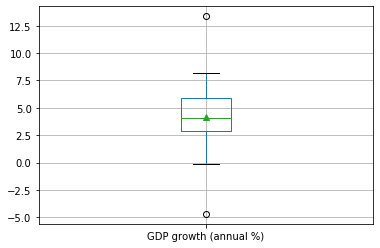

In [56]:
#To compare GDP growth of the countries of sub saharan region
africa_1.boxplot(column = 'GDP growth (annual %)',
                showmeans= True)

C:\Users\jeanp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:264: MatplotlibDeprecationWarning: The 'manage_xticks' parameter of boxplot() has been renamed 'manage_ticks' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
  bp = ax.boxplot(values, **kwds)


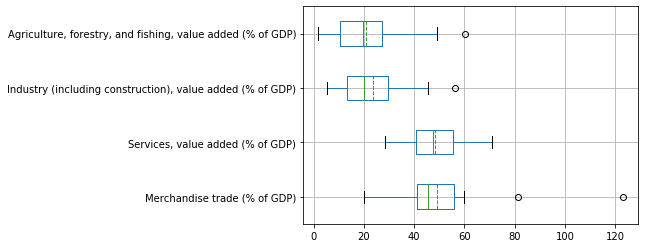

In [58]:
#Looking into three industry to understand the added value to the Countries GDP
#finding that services , trade, and general commerce contribute a lot to the GDP of the SUb saharan Africa

africa_1.boxplot(column        = ['Merchandise trade (% of GDP)','Services, value added (% of GDP)','Industry (including construction), value added (% of GDP)','Agriculture, forestry, and fishing, value added (% of GDP)'],
                 vert          = False,
                 manage_xticks = True, 
                 meanline      = True,
                 showmeans     = True)


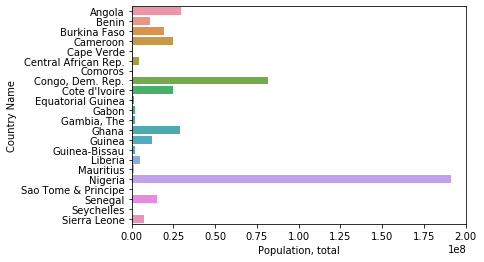

In [59]:
#comparing country population to understand the economical power of the country
#Nigeria is the most populated country followed by DRCongo 
ax = sns.barplot(x="Population, total", y="Country Name",  data=africa_1,)

In [60]:
africa_1.to_excel('excel_2.xlsx')

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Boxplot </h1>
    <br/>
Perform regression and calculate the R^2 using the polynomial features, use the data to train the model and test data to test the model.
</div>


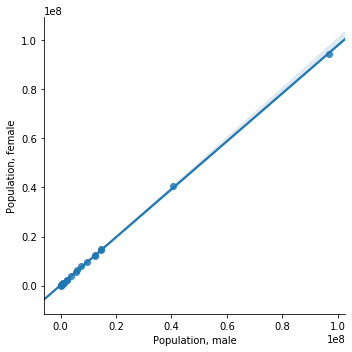

In [61]:
#comparing population of male to female in the region 
sns.lmplot(x='Population, male',y='Population, female',data=africa_1)

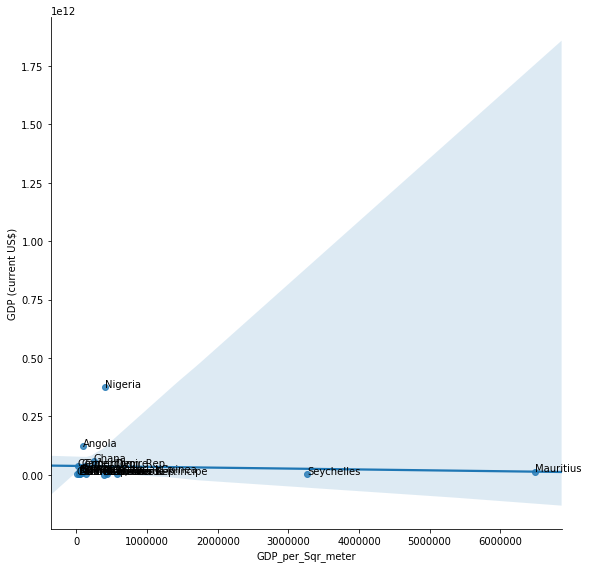

In [72]:
#to determine how well the country is doing when compared to ist size
sns.lmplot(x='GDP_per_Sqr_meter',y='GDP (current US$)',data=africa_1,height=8)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.01, point['y'], str(point['val']))

label_point(africa_1['GDP_per_Sqr_meter'], africa_1['GDP (current US$)'], africa_1['Country Name'], plt.gca())

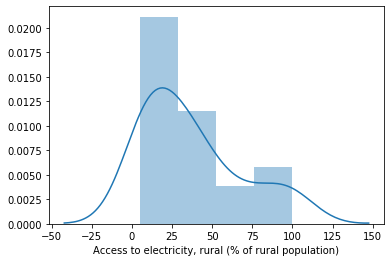

In [68]:
#There is no normal distribution in terms access to electricity for people living in 
#rural erea in the sub saharan Africa
#and which explain part of the problem with underdevelopement 
sns.distplot(africa_1['Access to electricity, rural (% of rural population)'])

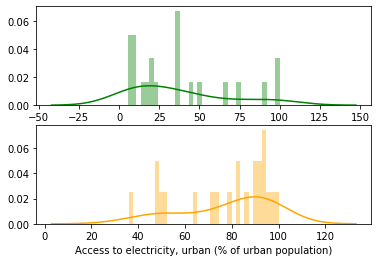

In [69]:
#a better understanding of urban electricity access compare to rural
#tell us a story of why the region 
#access to electricity compare from rural compare to urban 

plt.subplot(2, 1, 1)
sns.distplot(africa_1['Access to electricity, rural (% of rural population)'],
             bins = 35,
             color = 'g')


plt.subplot(2, 1, 2)
sns.distplot(africa_1['Access to electricity, urban (% of urban population)'],
             bins = 35,
             color = 'orange')

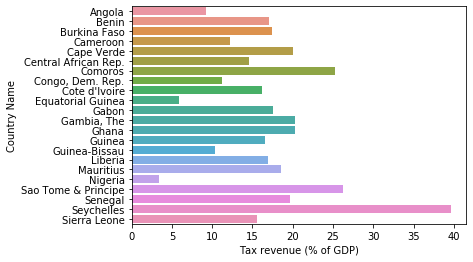

In [70]:
#The Government of the Seychelles through saving and increasing revenue we can deduct that 
#the Seychelles has a higher % of tax revenue compare to some of the strongest GDP of the 
#region, like Nigeria,and Angola.
#Everything being traded with the Seychelles is taxed which lead to obvious high tax % revenue
sns.barplot(data=africa_1, x="Tax revenue (% of GDP)",
y="Country Name")

<h1>Thank you for completing this notebook!</h1>

<h3>About the Author:</h3>

This notebook was written by <a href="https://www.linkedin.com/in/sarthakarun/" target="_blank">Sarthak Jagdale MSc</a>.

<p><a href="https://www.linkedin.com/in/sarthakarun/" target="_blank">Sarthak Jagdale</a> is a Data Scientist, and holds a MSc in Data Science and Btech in Electrical Engineering. His research focused on using Machine Learning, Signal Processing, and Computer Vision to determine how behavior impact human cognition. Sarthak has been working for several projects since he completed his second Masters.</p>